In [26]:
import os
import pickle as pkl
import sys
sys.path.append(r"/Users/binxuwang/Github/GPT-Auto-Data-Analytics")
from auto_analytics.utils.ipython_utils import richoutput_to_image
result_dir = r"/Users/binxuwang/Github/GPT-Auto-Data-Analytics/reports/ontime_delivery_analysis"

In [25]:
cache = pkl.load(open(f"{result_dir}/code_run_cache.pkl", "rb"))

In [38]:
for code, out, captured in cache:
    # print(captured)
    # print(out)
    # print(len(captured.outputs))
    print(captured.stdout)
    print(captured.stderr)
    for outi, output in enumerate(captured.outputs):
        if hasattr(output, "data"):
            print(outi, end=" ")
            if "image/png" in output.data:
                image = richoutput_to_image(output)
                print("IMAGE")
            elif 'text/plain' in output.data:
                print(output.data['text/plain'])
            elif 'text/html' in output.data:
                print(output.data['text/html'])
            else:
                print(output.data)
        else:
            print(output)
    # captured.show()



0 Text(0.5, 1.0, 'Average On-Time Delivery by Customer Rating')
1 IMAGE




0 ['ID',
 'Customer_care_calls',
 'Customer_rating',
 'Cost_of_the_Product',
 'Prior_purchases',
 'Discount_offered',
 'Weight_in_gms',
 'Reached.on.Time_Y.N',
 'Warehouse_block_B',
 'Warehouse_block_C',
 'Warehouse_block_D',
 'Warehouse_block_F',
 'Mode_of_Shipment_Road',
 'Mode_of_Shipment_Ship',
 'Product_importance_low',
 'Product_importance_medium',
 'Gender_M',
 'Price_to_Weight_ratio']


0 Text(0.5, 1.0, 'Average On-Time Delivery by Shipment Method')
1 IMAGE


0 Text(0.5, 1.0, 'Average Customer Rating by Number of Customer Care Calls')
1 IMAGE


0 (0.6436363636363637,
 '              precision    recall  f1-score   support\n\n           0       0.59      0.43      0.50       908\n           1       0.67      0.79      0.72      1292\n\n    accuracy                           0.64      2200\n   macro avg       0.63      0.61      0.61      2200\nweighted avg       0.64      0.64      0.63      2200\n')



### Vision API

In [5]:

image = richoutput_to_image(captured.outputs[1])
image.show()


In [11]:
hasattr(captured.outputs[0],"data")

True

In [12]:
captured.outputs[0].data

{'text/plain': "Text(0.5, 1.0, 'Average On-Time Delivery by Customer Rating')"}

In [15]:
from openai import OpenAI
import time
from auto_analytics.utils.format_utils import Markdown, display

def vision_qa_response(prompt, base64_image, 
                       img_fmt='image/png', max_tokens=1024,):
    client = OpenAI()
    response = client.chat.completions.create(
    model="gpt-4-vision-preview",
    messages=[
        {
        "role": "user",
        "content": [
            {
            "type": "text",
            "text": prompt, 
            },
            {
            "type": "image_url",
            "image_url": {
                # "url": f"data:image/jpeg;base64,{base64_image}"
                "url": f"data:{img_fmt};base64,{base64_image}"
            }
            }
        ]
        }
    ],
    max_tokens=max_tokens,
    )
    # print(response.choices[0])
    # print(response.choices[0].message.content)
    display(Markdown(response.choices[0].message.content))
    return response.choices[0].message



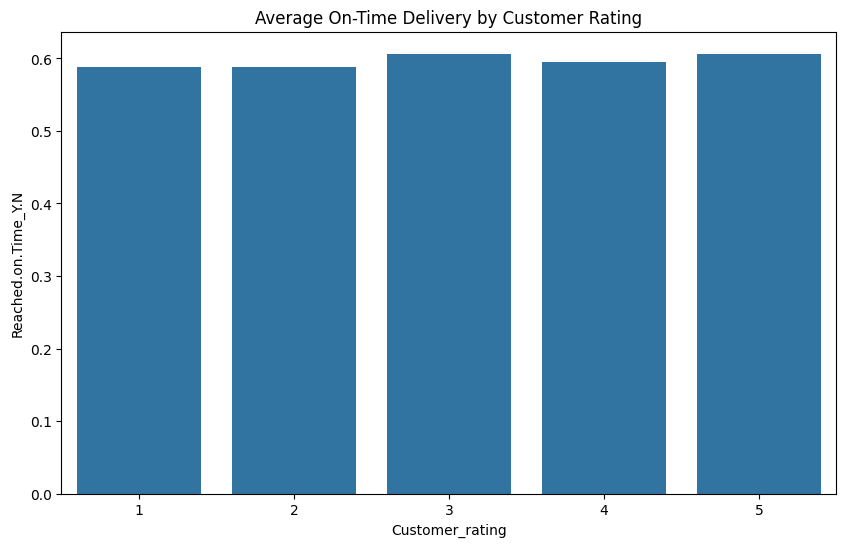

The figure shown is a bar graph representing the average on-time delivery rate across different customer ratings. The x-axis is labeled "Customer_rating" and has values ranging from 1 to 5, which likely correspond to a scale of customer satisfaction or a similar metric. The y-axis is labeled "Reached.on.Time_Y.N" and provides values that show the proportion or percentage of on-time deliveries, ranging from 0 up to potentially 1.0 (though it's not clearly marked at the top), which would indicate a 100% on-time delivery rate.

All five bars appear to be quite similar in height, suggesting that there is not a significant difference in the on-time delivery rate across the different customer ratings. This could imply that the delivery performance, in terms of timeliness, is consistent regardless of how customers rate the service overall.

A few insights that could be drawn from this figure are:

1. Customer rating does not seem to drastically affect the on-time delivery performance, as the 

The figure shown is a bar graph representing the average on-time delivery rate across different customer ratings. The x-axis is labeled "Customer_rating" and has values ranging from 1 to 5, which likely correspond to a scale of customer satisfaction or a similar metric. The y-axis is labeled "Reached.on.Time_Y.N" and provides values that show the proportion or percentage of on-time deliveries, ranging from 0 up to potentially 1.0 (though it's not clearly marked at the top), which would indicate a 100% on-time delivery rate.

All five bars appear to be quite similar in height, suggesting that there is not a significant difference in the on-time delivery rate across the different customer ratings. This could imply that the delivery performance, in terms of timeliness, is consistent regardless of how customers rate the service overall.

A few insights that could be drawn from this figure are:

1. Customer rating does not seem to drastically affect the on-time delivery performance, as the average rate is relatively stable across ratings.
2. Given that all ratings show similarly high on-time delivery rates, it suggests that timeliness is a strong aspect of the service, though this doesn't necessarily correspond to higher customer satisfaction.
3. Since the y-values appear to be above 0.5, it indicates that more than half of the deliveries are on-time for all customer ratings.

Without error bars or additional statistical measures, such as confidence intervals, it's difficult to assess the variability or significance of the differences between the bars in the graph. Additional analysis would be required to determine if small differences between the ratings are statistically significant or if they could be attributed to random variation.

Time elapsed: 42.82 seconds


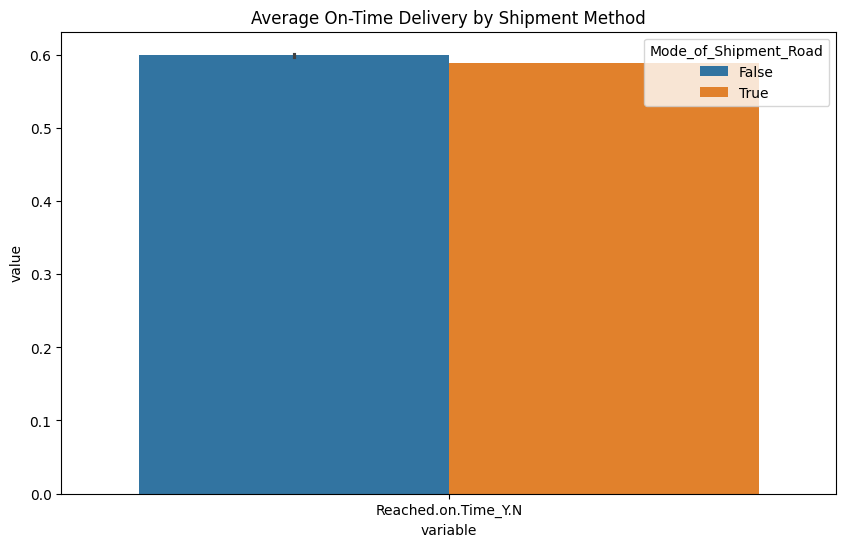

The bar chart illustrates the average on-time delivery performance for two methods of shipment based on whether road transport is involved (true or false). The x-axis denotes the data variable 'Reached.on.Time_Y.N', which likely represents whether the deliveries were reached on time ('Y' for yes and 'N' for no). The y-axis represents the value of on-time delivery, which, given the context, is most likely a proportion or percentage.

There are two bars in the chart, with different colors indicating whether road shipment was used. The blue bar represents deliveries where road shipment was not used (False), and the orange bar represents deliveries where road shipment was used (True).

Both bars are fairly close in height, suggesting that the average on-time delivery rate for shipments that did or did not use road transport is similar. However, it's worth noting that the bar representing shipments not involving road transport (Mode_of_Shipment_Road: False) is slightly higher, implying a mi

The bar chart illustrates the average on-time delivery performance for two methods of shipment based on whether road transport is involved (true or false). The x-axis denotes the data variable 'Reached.on.Time_Y.N', which likely represents whether the deliveries were reached on time ('Y' for yes and 'N' for no). The y-axis represents the value of on-time delivery, which, given the context, is most likely a proportion or percentage.

There are two bars in the chart, with different colors indicating whether road shipment was used. The blue bar represents deliveries where road shipment was not used (False), and the orange bar represents deliveries where road shipment was used (True).

Both bars are fairly close in height, suggesting that the average on-time delivery rate for shipments that did or did not use road transport is similar. However, it's worth noting that the bar representing shipments not involving road transport (Mode_of_Shipment_Road: False) is slightly higher, implying a minor advantage in on-time delivery performance when road shipment is excluded.

To draw further insights, one would need to consider additional context such as the scale of the value axis, specific numerical differences, and error bars or confidence intervals that might indicate the statistical significance of the differences observed. Also, it would be important to consider external factors that may influence the delivery times, such as distance, geography, weather conditions, and other logistical concerns.

One limitation of the chart is that it does not give information on other shipment methods that might be used, aside from road, nor does it indicate the mix of shipment methods paired with road shipment (if any) denoted by the 'True' category.

Time elapsed: 18.51 seconds


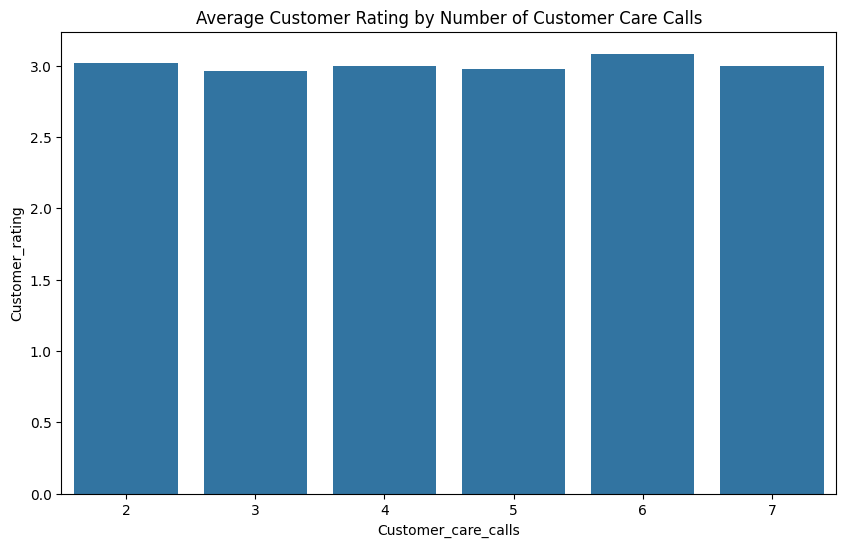

The bar chart you have provided illustrates the average customer rating as a function of the number of customer care calls. The x-axis represents the number of customer care calls ranging from 2 to 7, and the y-axis shows the customer rating, which appears to be on a scale, although the specific range of the scale isn't indicated.

From the chart, it appears that the customer rating is relatively consistent across the number of customer care calls, hovering around a specific value, which seems to be between 2.5 and 3.0 (again, the exact scale is not visible in the image). There's no clear trend or significant variation observable from the data provided in this visualization, which might suggest that, within this dataset, the number of customer care calls does not strongly impact the average customer rating.

However, to draw more robust conclusions, one would have to look at the context of the data, such as the scale of ratings, customer expectations, the nature and quality of customer

The bar chart you have provided illustrates the average customer rating as a function of the number of customer care calls. The x-axis represents the number of customer care calls ranging from 2 to 7, and the y-axis shows the customer rating, which appears to be on a scale, although the specific range of the scale isn't indicated.

From the chart, it appears that the customer rating is relatively consistent across the number of customer care calls, hovering around a specific value, which seems to be between 2.5 and 3.0 (again, the exact scale is not visible in the image). There's no clear trend or significant variation observable from the data provided in this visualization, which might suggest that, within this dataset, the number of customer care calls does not strongly impact the average customer rating.

However, to draw more robust conclusions, one would have to look at the context of the data, such as the scale of ratings, customer expectations, the nature and quality of customer care provided, and the data range and distribution for each number of calls. It would also be helpful to look at the sample size for each category, as a low sample size can make the averages less reliable. Additional statistical analysis, such as the calculation of confidence intervals, could provide deeper insights into the significance of the differences observed. Overall, the chart communicates a message that customer satisfaction as recorded by average rating does not significantly vary with an increasing number of customer service interactions in the provided dataset.

Time elapsed: 18.72 seconds


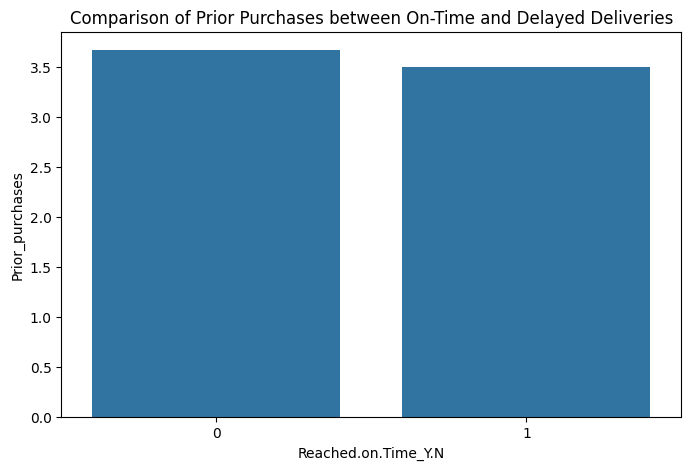

The bar chart presented visualizes a comparison between the average number of prior purchases for two categories: deliveries that reached on time (indicated by "0") and deliveries that were delayed (indicated by "1"). Both categories have bar heights that appear to be quite similar and indicate the average number of prior purchases is roughly the same for both on-time and delayed deliveries.

Based on this visualization, we can infer the following:

1. The average number of prior purchases does not seem to significantly differ between deliveries that were on time and those that were delayed. This suggests that the timeliness of the delivery may not be directly influenced by how often customers have previously purchased from the company.

2. If this data originated from a business trying to assess whether customer loyalty (implied by the number of prior purchases) affects delivery performance, the results depicted here would suggest that loyalty, in this case, does not have a noticeable

The bar chart presented visualizes a comparison between the average number of prior purchases for two categories: deliveries that reached on time (indicated by "0") and deliveries that were delayed (indicated by "1"). Both categories have bar heights that appear to be quite similar and indicate the average number of prior purchases is roughly the same for both on-time and delayed deliveries.

Based on this visualization, we can infer the following:

1. The average number of prior purchases does not seem to significantly differ between deliveries that were on time and those that were delayed. This suggests that the timeliness of the delivery may not be directly influenced by how often customers have previously purchased from the company.

2. If this data originated from a business trying to assess whether customer loyalty (implied by the number of prior purchases) affects delivery performance, the results depicted here would suggest that loyalty, in this case, does not have a noticeable impact on whether deliveries are on time or delayed.

However, please note that this is a basic analysis and more information like standard deviation, sample size, and statistical significance would be needed to draw definitive conclusions. Without error bars or confidence intervals on the bars, we cannot make strong statements about the certainty of these insights. Moreover, other external factors not presented in the chart could also influence delivery performance.

Time elapsed: 19.91 seconds


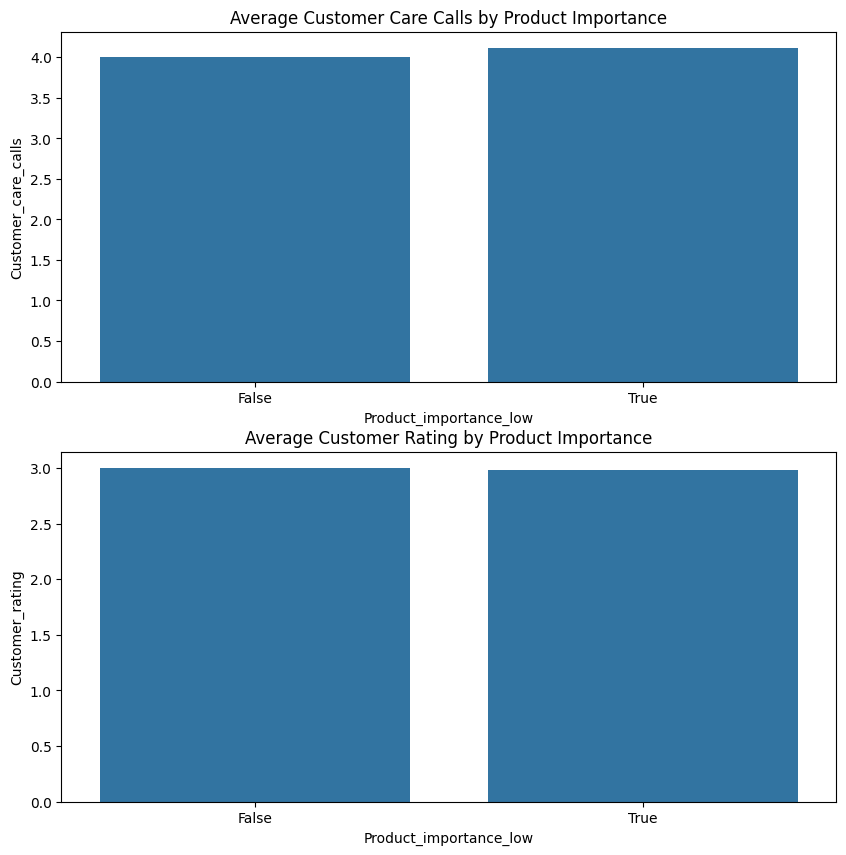

The figure consists of two bar charts, one above the other, both showing the average values for certain metrics categorized by whether the product importance is labeled as low or not (True or False).

In the first chart, titled "Average Customer Care Calls by Product Importance," we observe two bars representing the average number of customer care calls. The left bar corresponds to products that are not labeled as low importance (False), and the right bar corresponds to products that are labeled as low importance (True). It can be seen that the average number of calls for products with a low importance label (True) is slightly lower than that of the products without the low importance label.

In the second chart, titled "Average Customer Rating by Product Importance," there are again two bars showcasing the average customer rating with the same categorical representation. The left bar (False) once again represents products not labeled as low importance, while the right bar (True) corre

The figure consists of two bar charts, one above the other, both showing the average values for certain metrics categorized by whether the product importance is labeled as low or not (True or False).

In the first chart, titled "Average Customer Care Calls by Product Importance," we observe two bars representing the average number of customer care calls. The left bar corresponds to products that are not labeled as low importance (False), and the right bar corresponds to products that are labeled as low importance (True). It can be seen that the average number of calls for products with a low importance label (True) is slightly lower than that of the products without the low importance label.

In the second chart, titled "Average Customer Rating by Product Importance," there are again two bars showcasing the average customer rating with the same categorical representation. The left bar (False) once again represents products not labeled as low importance, while the right bar (True) corresponds to products labeled as low importance. Similar to the pattern in the first chart, the products with the low importance label seem to have a slightly lower average customer rating compared to products without the low importance label.

From the data presented in these charts, a tentative insight could be drawn that products tagged with a low level of importance tend to receive fewer customer care calls and slightly lower customer ratings. However, to make a definitive claim, one would need to assess the statistical significance of these differences and also consider other factors that could influence these metrics, such as the type of product, market segment, or customer expectations.

Time elapsed: 27.34 seconds


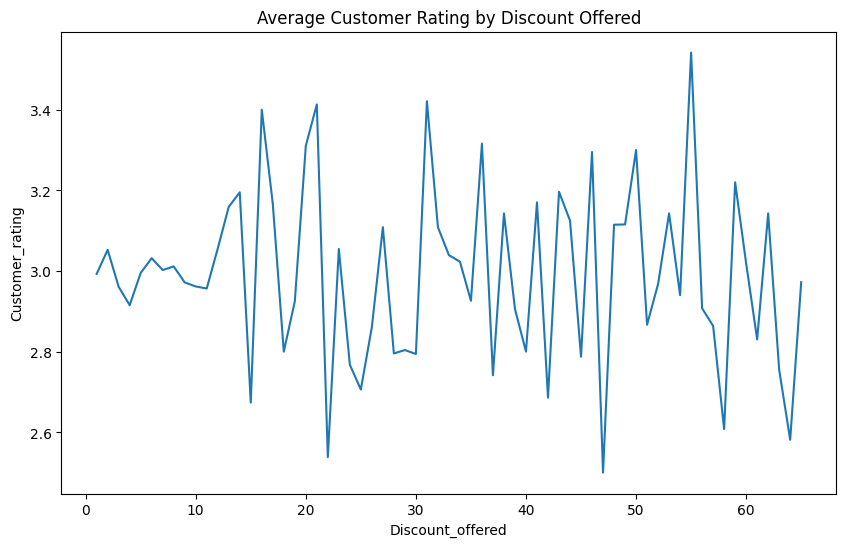

The line graph you've provided shows the relationship between the discount offered and the average customer rating. The x-axis represents the discount offered, which appears to range from 0 to roughly 60 (units are not specified but could imply percentage or another relevant scale), while the y-axis represents the customer rating, ranging from just below 2.8 to just over 3.4 on a rating scale—this could be out of 5 or 10, though it's usually out of 5 in most customer rating systems.

From the graph, it is apparent that there's a lot of variability in customer ratings across different levels of discounts offered. There's no clear trend that suggests that higher discounts lead to higher customer satisfaction or vice versa. For instance, we can see some peaks in average customer rating, which occur at various points along the discount range rather than increasing or decreasing consistently with the discount size.

The high level of fluctuation suggests that factors other than the discount

The line graph you've provided shows the relationship between the discount offered and the average customer rating. The x-axis represents the discount offered, which appears to range from 0 to roughly 60 (units are not specified but could imply percentage or another relevant scale), while the y-axis represents the customer rating, ranging from just below 2.8 to just over 3.4 on a rating scale—this could be out of 5 or 10, though it's usually out of 5 in most customer rating systems.

From the graph, it is apparent that there's a lot of variability in customer ratings across different levels of discounts offered. There's no clear trend that suggests that higher discounts lead to higher customer satisfaction or vice versa. For instance, we can see some peaks in average customer rating, which occur at various points along the discount range rather than increasing or decreasing consistently with the discount size.

The high level of fluctuation suggests that factors other than the discount level might be influencing customer satisfaction. This could include the nature of the product or service being discounted, the expectations of the customers, the quality of service, or possible variations in how the discount is being applied or communicated.

To draw more definitive insights from this data, one might consider looking at additional variables that could be interacting with the discount to affect customer satisfaction, or exploring this data as part of a broader model. It may also be useful to look at other types of analysis such as segmentation of customers, or controlling for other variables that might impact satisfaction to better understand the relationship depicted in this graph.

Time elapsed: 28.55 seconds


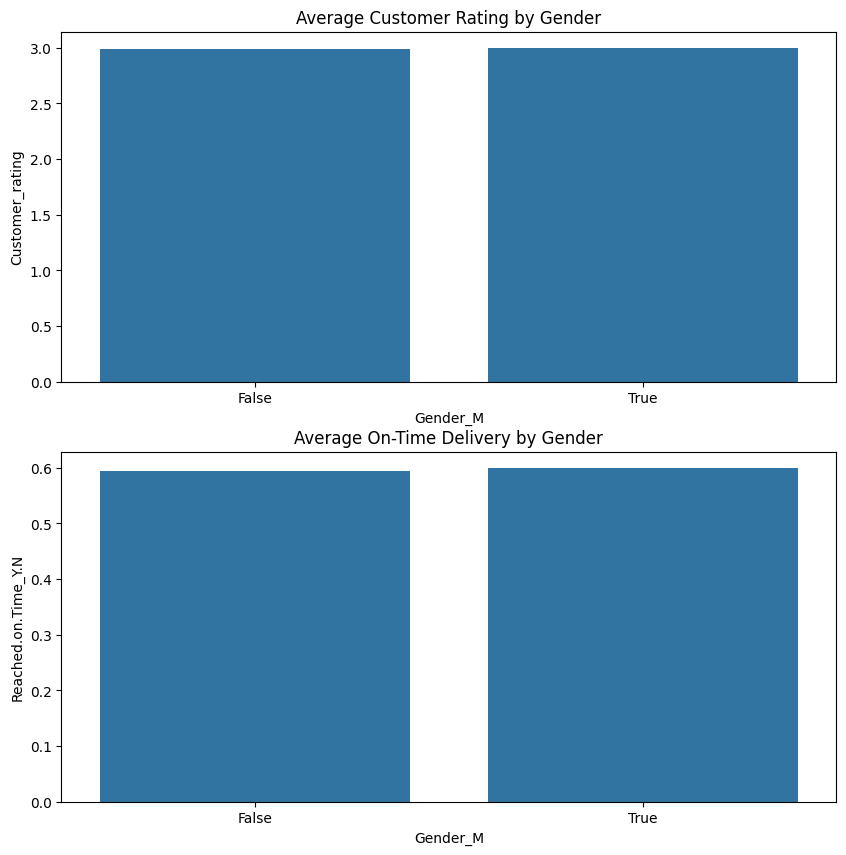

The figure consists of two bar charts that compare average customer ratings and average on-time delivery percentages across two different gender categories, which are represented here as "False" and "True" under the label `Gender_M`.

In the first chart, titled "Average Customer Rating by Gender," both gender categories have customer ratings between 2.5 and 3 on a scale that isn't fully visible. The bars look quite similar in height, suggesting there might not be a significant difference in the average customer ratings between these two gender categories.

The second chart, titled "Average On-Time Delivery by Gender," shows on-time delivery percentages for the same gender categories. The "False" category shows a value slightly above 0.5, while the "True" category is around the 0.6 mark. This suggests that the "True" gender category has a higher on-time delivery rate compared to the "False" category.

From these charts, we could infer:

1. Customer satisfaction, as measured by ratings, 

The figure consists of two bar charts that compare average customer ratings and average on-time delivery percentages across two different gender categories, which are represented here as "False" and "True" under the label `Gender_M`.

In the first chart, titled "Average Customer Rating by Gender," both gender categories have customer ratings between 2.5 and 3 on a scale that isn't fully visible. The bars look quite similar in height, suggesting there might not be a significant difference in the average customer ratings between these two gender categories.

The second chart, titled "Average On-Time Delivery by Gender," shows on-time delivery percentages for the same gender categories. The "False" category shows a value slightly above 0.5, while the "True" category is around the 0.6 mark. This suggests that the "True" gender category has a higher on-time delivery rate compared to the "False" category.

From these charts, we could infer:

1. Customer satisfaction, as measured by ratings, appears to be roughly similar across the gender categories defined as "False" and "True," with no noticeable differences, indicating that the gender split in the dataset may not be influencing customer satisfaction ratings.

2. On-time delivery performance seems better for the "True" gender category compared to the "False" category. Assuming "Reached.on.Time_Y.N" indicates a binary outcome where 1 represents on-time delivery and 0 represents late delivery, the higher average for the "True" category suggests better on-time delivery efficiency for that group.

Without additional context, we cannot definitively interpret what "False" and "True" refer to in terms of gender, as this categorization is not standard and could refer to a binary transformation of a non-binary variable, a comparison between two specific groups, or some other encoded representation of gender data. Further investigation into the dataset and its encoding would be necessary to draw more specific conclusions.

Time elapsed: 24.29 seconds


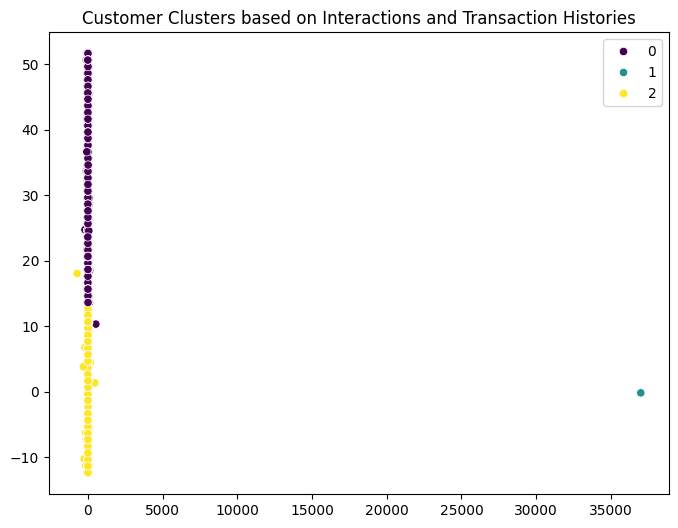

The figure presented appears to be a scatter plot visualizing customer clusters based on interactions and transaction histories. The plot maps two principal components on the x and y axes, resulting from dimensionality reduction via PCA on the selected features: 'Weight_in_gms', 'Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Price_to_Weight_ratio'. These features have likely been chosen to capture different aspects of customer behavior and transactional data.

From the scatter plot, we can draw the following insights:

1. There are three distinct clusters, labeled as 0, 1, and 2, indicated by the different colors—dark purple, light purple, and yellow, respectively.

2. The vast majority of the data points are in cluster 0, as indicated by the dark purple color. This cluster is relatively tight and vertically oriented, which could suggest that these customers have similar behaviors or preferences with small variations along the principal component 

The figure presented appears to be a scatter plot visualizing customer clusters based on interactions and transaction histories. The plot maps two principal components on the x and y axes, resulting from dimensionality reduction via PCA on the selected features: 'Weight_in_gms', 'Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Price_to_Weight_ratio'. These features have likely been chosen to capture different aspects of customer behavior and transactional data.

From the scatter plot, we can draw the following insights:

1. There are three distinct clusters, labeled as 0, 1, and 2, indicated by the different colors—dark purple, light purple, and yellow, respectively.

2. The vast majority of the data points are in cluster 0, as indicated by the dark purple color. This cluster is relatively tight and vertically oriented, which could suggest that these customers have similar behaviors or preferences with small variations along the principal component on the y-axis.

3. Cluster 1, in light purple, seems to be an intermediate group between cluster 0 and 2 in terms of the principal component on the x-axis. This cluster is also vertically oriented but covers a larger range on the y-axis, suggesting that these customers have similar behaviors or preferences but with more variation compared to cluster 0.

4. Cluster 2, represented in yellow, contains very few data points and is placed far away from the other two clusters on the lower right corner of the plot. This might represent a small, perhaps more distinct group of customers whose behaviors or preferences are significantly different from the other two clusters.

5. The distribution of clusters across the principal components suggests that there might be a significant variance explained by the principal component on the x-axis because the clusters are primarily spread out along this axis.

It's important to note that the actual features influencing the separation of clusters are abstracted by the PCA, and further investigation would be needed to determine what specific behaviors or preferences are driving the formation of these clusters. Nonetheless, the businesses could use these insights to tailor marketing strategies or improve customer segmentation based on the profiles inferred from these clusters.

Time elapsed: 26.96 seconds


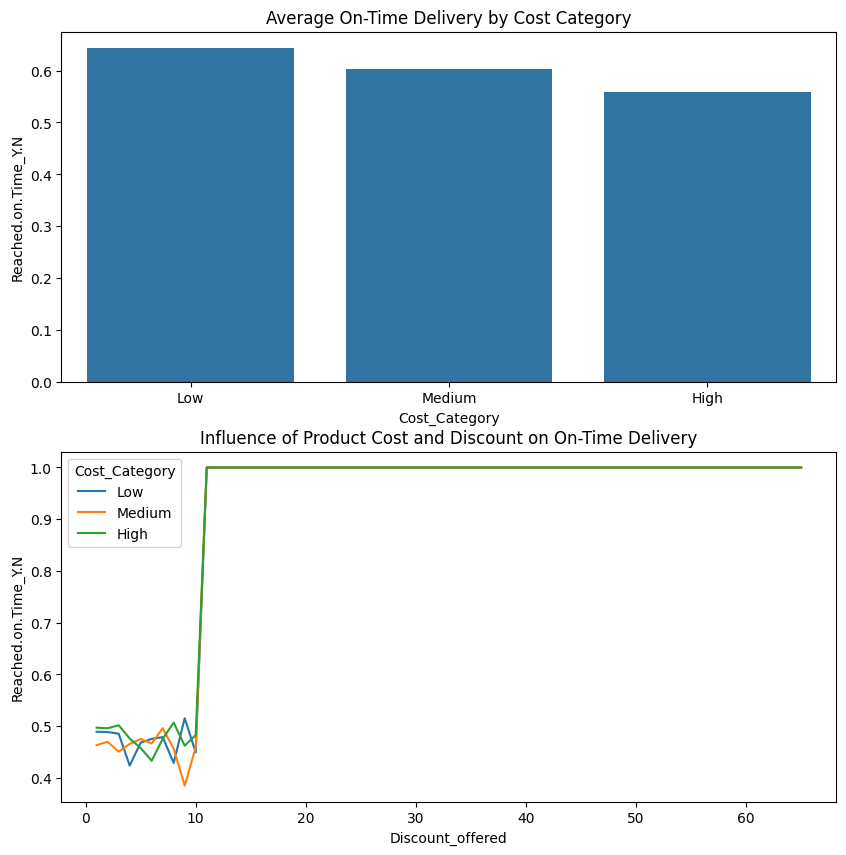

Based on the figures provided, I can offer the following insights:

1. **Average On-Time Delivery by Cost Category**:
   - The top bar graph shows the average on-time delivery rates categorized by the cost of the product (Low, Medium, High).
   - The on-time delivery rate is slightly higher for products in the 'Low' cost category compared to 'Medium' and 'High' categories, suggesting that less expensive items may be delivered on time more frequently.
   - However, the differences among the categories are not very pronounced, indicating that cost alone may not be a strong determinant for on-time delivery.

2. **Influence of Product Cost and Discount on On-Time Delivery**:
   - The bottom line graph depicts the relationship between the discount offered on the product and the on-time delivery rate, broken down by cost category.
   - All cost categories start with high on-time delivery rates when no discount is offered. As the discount increases, we see a sharp decrease in the on-time deli

Based on the figures provided, I can offer the following insights:

1. **Average On-Time Delivery by Cost Category**:
   - The top bar graph shows the average on-time delivery rates categorized by the cost of the product (Low, Medium, High).
   - The on-time delivery rate is slightly higher for products in the 'Low' cost category compared to 'Medium' and 'High' categories, suggesting that less expensive items may be delivered on time more frequently.
   - However, the differences among the categories are not very pronounced, indicating that cost alone may not be a strong determinant for on-time delivery.

2. **Influence of Product Cost and Discount on On-Time Delivery**:
   - The bottom line graph depicts the relationship between the discount offered on the product and the on-time delivery rate, broken down by cost category.
   - All cost categories start with high on-time delivery rates when no discount is offered. As the discount increases, we see a sharp decrease in the on-time delivery rates for all cost categories, although 'High' cost products see less of a decline.
   - After this initial decline, the on-time delivery rates appear to stabilize and fluctuate at different discount levels. This suggests that beyond a certain discount threshold, further discounts do not necessarily correlate with significant changes in on-time delivery performance.
   - It is interesting to note that across the range of discount levels, high-cost products generally maintain a higher on-time delivery rate than medium and low-cost products.

Overall, these figures suggest that while there is some impact of product cost on on-time delivery, the effect of discounts is more nuanced. Initially, higher discounts seem to be associated with a decrease in on-time delivery, but this effect stabilizes, and significantly varying the discount does not lead to a consistent improvement or worsening in on-time delivery rates. To draw more definitive conclusions, additional context on the dataset and statistical significance of the observed differences would be necessary.

Time elapsed: 32.28 seconds


In [16]:
# img_fmt = "image/png"
# base64_image = captured.outputs[1].data['image/png']
vqa_results = []
for code, out, captured in cache:
    for output in captured.outputs:
        if hasattr(output, "data"):
            if "image/png" in output.data:
                image = richoutput_to_image(output)
                # image.show()
                display(output)
                question = f"Descirbe the figure from a data analysis notebook "\
                    f"generated from the code {code}. Try to draw some insights from the figure."
                t0 = time.time()
                message = vision_qa_response(question, output.data['image/png'], 
                                             img_fmt='image/png', max_tokens=1024,)
                t1 = time.time()
                print(f"Time elapsed: {t1-t0:.2f} seconds")
                vqa_results.append((code, output, image, message))

pkl.dump(vqa_results, open(f"{result_dir}/figure_vision_qa_results.pkl", "wb"))

In [23]:
import nbformat
from nbformat.v4 import new_code_cell, new_markdown_cell, new_output, new_notebook
from auto_analytics.utils.nbformat_utils import new_notebook, new_code_cell, new_output, save_cells_to_nb
cell_col = []
for code, output, image, message in vqa_results:
    code_cell = new_code_cell(code)
    if hasattr(output, 'data'):
        # For rich outputs (e.g., plots), `data` attribute holds the MIME-typed representations
        output_cell = new_output(
            output_type='display_data',
            data=output.data,
            metadata=output.metadata
        )
    elif hasattr(output, 'text'):
        # For text outputs, `text` attribute holds the content
        output_cell = new_output(
            output_type='stream',
            name='stdout',  # or 'stderr' for error outputs
            text=output.text
        )
    else:
        continue
    code_cell.outputs.append(output_cell)
    cell_col.append(code_cell)
    md_cell = new_markdown_cell("### Vision QA\n"+message.content)
    cell_col.append(md_cell)
    
save_cells_to_nb(cell_col, f"{result_dir}/figure_vision_qa_results.ipynb", 
                 save_html=True, save_pdf=True)

Notebook saved to /Users/binxuwang/Github/GPT-Auto-Data-Analytics/reports/ontime_delivery_analysis/figure_vision_qa_results.ipynb
PDF report saved to /Users/binxuwang/Github/GPT-Auto-Data-Analytics/reports/ontime_delivery_analysis/figure_vision_qa_results.pdf
HTML report saved to /Users/binxuwang/Github/GPT-Auto-Data-Analytics/reports/ontime_delivery_analysis/figure_vision_qa_results.html


{'nbformat': 4,
 'nbformat_minor': 5,
 'metadata': {},
 'cells': [{'id': 'd70ef174',
   'cell_type': 'code',
   'metadata': {},
   'execution_count': None,
   'source': "# Statistical Analysis of the relationship between customer rating and on-time delivery\nimport seaborn as sns\nimport matplotlib.pyplot as plt\n\n# Calculate the average on-time delivery for each customer rating\navg_on_time_delivery = dataset.groupby('Customer_rating')['Reached.on.Time_Y.N'].mean().reset_index()\n\n# Visualize the relationship between customer rating and on-time delivery\nplt.figure(figsize=(10, 6))\nsns.barplot(x='Customer_rating', y='Reached.on.Time_Y.N', data=avg_on_time_delivery)\nplt.title('Average On-Time Delivery by Customer Rating')",
   'outputs': [{'output_type': 'display_data',
     'metadata': {},
     'data': {'text/plain': '<Figure size 1000x600 with 1 Axes>',
      'image/png': 'iVBORw0KGgoAAAANSUhEUgAAA04AAAIjCAYAAAA0vUuxAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMiwgaHR0cHM6

In [20]:
message.content

'The figure shown is a bar graph representing the average on-time delivery rate across different customer ratings. The x-axis is labeled "Customer_rating" and has values ranging from 1 to 5, which likely correspond to a scale of customer satisfaction or a similar metric. The y-axis is labeled "Reached.on.Time_Y.N" and provides values that show the proportion or percentage of on-time deliveries, ranging from 0 up to potentially 1.0 (though it\'s not clearly marked at the top), which would indicate a 100% on-time delivery rate.\n\nAll five bars appear to be quite similar in height, suggesting that there is not a significant difference in the on-time delivery rate across the different customer ratings. This could imply that the delivery performance, in terms of timeliness, is consistent regardless of how customers rate the service overall.\n\nA few insights that could be drawn from this figure are:\n\n1. Customer rating does not seem to drastically affect the on-time delivery performance,

In [ ]:
import base64
import requests
from auto_analytics.utils.format_utils import Markdown, display
from openai import OpenAI
# api_key = os.environ.get("OPENAI_API_KEY")
img_fmt = "image/png"
base64_image = captured.outputs[1].data['image/png']

client = OpenAI()
response = client.chat.completions.create(
  model="gpt-4-vision-preview",
  messages=[
    {
      "role": "user",
      "content": [
        {
          "type": "text",
          "text": "Descirbe the figure from a data analysis notebook."
        },
        {
          "type": "image_url",
          "image_url": {
            # "url": f"data:image/jpeg;base64,{base64_image}"
            "url": f"data:{img_fmt};base64,{base64_image}"
          }
        }
      ]
    }
  ],
  max_tokens=1024,
)
print(response.choices[0])
display(Markdown(response.choices[0].message.content))

Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='The figure provided appears to consist of two separate graphs related to a dataset analyzing on-time delivery performance in relation to product cost categories and discount offered.\n\nThe upper graph is a bar chart titled "Average On-Time Delivery by Cost Category." It has three bars each corresponding to a different cost category: Low, Medium, and High. The vertical axis is labeled "Product On-Time [%]" and ranges from 0.0 to at least 0.7, indicating a percentage or proportion. Each bar represents the average on-time delivery rate for its respective cost category. From the appearance of the chart, the Low and Medium cost categories have similar on-time delivery performance, both being above 0.6, while the High cost category has a slightly lower on-time delivery rate, shown by the shorter bar.\n\nThe lower graph is a line plot titled "Influence of Product Cost and Discount on On-Time Delivery.

In [ ]:

display(Markdown(response.choices[0].message.content))
# import textwrap
# wrapped_code = textwrap.dedent(f"""
#     {response.choices[0].message.content}
# """)

# wrapped_code = textwrap.fill(wrapped_code, width=80)

# print(wrapped_code)


The figure provided appears to consist of two separate graphs related to a dataset analyzing on-time delivery performance in relation to product cost categories and discount offered.

The upper graph is a bar chart titled "Average On-Time Delivery by Cost Category." It has three bars each corresponding to a different cost category: Low, Medium, and High. The vertical axis is labeled "Product On-Time [%]" and ranges from 0.0 to at least 0.7, indicating a percentage or proportion. Each bar represents the average on-time delivery rate for its respective cost category. From the appearance of the chart, the Low and Medium cost categories have similar on-time delivery performance, both being above 0.6, while the High cost category has a slightly lower on-time delivery rate, shown by the shorter bar.

The lower graph is a line plot titled "Influence of Product Cost and Discount on On-Time Delivery." There are three lines, each representing a different cost category: Low, Medium, and High, indicated by different colors in the graph legend. The horizontal axis is labeled "Discount_offered" and it ranges from 0 to at least 60, suggesting the range of discounts offered. The vertical axis matches the upper graph, labeled "Product On-Time [%]". This graph shows the on-time delivery rate against the discount offered for the three cost categories. The lines are somewhat volatile, indicating fluctuations in on-time delivery performance as discounts vary. The most notable feature is a spike for the Low and Medium categories at the beginning, where on-time delivery performance seems to rapidly increase as a small discount is offered, and then drop as the discount increases before stabilizing to some extent. The High cost category line remains relatively more stable across different discount levels.

Both graphs are part of a data analysis likely aimed at understanding how product cost and discounts affect the reliability of on-time delivery.

In [ ]:
import base64
import requests
api_key = os.environ.get("OPENAI_API_KEY")

# Function to encode the image
def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')

# Path to your image
# image_path = "path_to_your_image.jpg"

# Getting the base64 string
# base64_image = encode_image(image_path)

base64_image = captured.outputs[1].data['image/png']
headers = {
  "Content-Type": "application/json",
  "Authorization": f"Bearer {api_key}"
}

payload = {
  "model": "gpt-4-vision-preview",
  "messages": [
    {
      "role": "user",
      "content": [
        {
          "type": "text",
          "text": "Descirbe the figure for the data analysis."
        },
        {
          "type": "image_url",
          "image_url": {
            # "url": f"data:image/jpeg;base64,{base64_image}"
            "url": f"data:image/png;base64,{base64_image}"
          }
        }
      ]
    }
  ],
  "max_tokens": 1500
}

response = requests.post("https://api.openai.com/v1/chat/completions", 
                         headers=headers, json=payload)

print(response.json())

{'id': 'chatcmpl-91U6a2CA2OZbTFW5pPgAMaaBfgXhP', 'object': 'chat.completion', 'created': 1710141080, 'model': 'gpt-4-1106-vision-preview', 'usage': {'prompt_tokens': 782, 'completion_tokens': 300, 'total_tokens': 1082}, 'choices': [{'message': {'role': 'assistant', 'content': 'The figure provided consists of two separate graphs related to data analysis of on-time delivery performance by various categories.\n\n1. The top graph is titled "Average On-Time Delivery by Cost Category" and is a bar chart:\n   - It has three bars representing three categories: Low, Medium, and High, presumably referring to the cost categories of products.\n   - The vertical axis is labeled "Reached On Time [%]" which indicates the percentage of deliveries that were on time. The range of the axis starts from 0.0 to a little over 0.7, with the bars showing the mean values for each category.\n   - The Low category shows a value close to 0.7, Medium shows slightly less than Low, and High shows a value significantl

In [ ]:
print(response.json().get('choices')[0].get('message').get('content'))

The figure provided consists of two separate graphs related to data analysis of on-time delivery performance by various categories.

1. The top graph is titled "Average On-Time Delivery by Cost Category" and is a bar chart:
   - It has three bars representing three categories: Low, Medium, and High, presumably referring to the cost categories of products.
   - The vertical axis is labeled "Reached On Time [%]" which indicates the percentage of deliveries that were on time. The range of the axis starts from 0.0 to a little over 0.7, with the bars showing the mean values for each category.
   - The Low category shows a value close to 0.7, Medium shows slightly less than Low, and High shows a value significantly below 0.7, indicating that items in the Low cost category have the highest average on-time delivery rate and items in the High cost category have the lowest.

2. The bottom graph is titled "Influence of Product Cost and Discount on On-Time Delivery" and is a line chart:
   - The h